
<!-- Task Title -->

<div style="background-color: #708090; padding: 20px; border-radius: 10px; box-shadow: 5px 5px 10px #888888;">
  <h1 style="color: white; font-size: 30px; font-weight: bold; text-align: center; text-shadow: 2px 2px 4px #000000;">**Task 18: ML (Clustering Algorithm III)🔍🧩🤖**</h1>
</div>


These tasks cover key aspects of clustering algorithms, including implementation, evaluation, and comparison, providing hands-on experience with K-Means and hierarchical clustering techniques.


**Deadline: 1 August 2024**

.___ __ __ __ __ __ __ __ __

***@Bytewiseltd***
_______________________________________________________________________________________________________________________________

__________________________________________


<!-- <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span> -->

<div style="text-align: right;">
    <span style="background-color: #1A237E; color: white; padding: 5px; font-weight: bold; font-family: 'Times New Roman', Times, serif; font-style: italic;">~ Moneka</span>
</div>

_________________________________________

# **Tasks 🔍🧩**

## **[Wholesale Customers Dataset](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)**

## 1. **K-Means Clustering for Customer Segmentation** 🛍️

**Task:**
Use K-Means clustering to segment customers based on their annual spending across various categories. Visualize the resulting clusters.

---

## 2. **Evaluating the Optimal Number of Clusters** 📈

**Task:**
Determine the optimal number of clusters using the Elbow Method and Silhouette Score. Visualize and justify the choice of the number of clusters.

---

## 3. **Cluster Analysis and Interpretation** 🔍

**Task:**
Interpret the clusters formed in the Wholesale Customers dataset. Identify the characteristics and differences among the clusters based on spending behavior.

---

## 4. **Hierarchical Clustering: Dendrogram and Cluster Formation** 🌲

**Task:**
Apply hierarchical clustering to the dataset and visualize the dendrogram. Compare the clusters with those obtained from K-Means, and discuss the differences.

---

## 5. **Comparison of Clustering Results** 🔄

**Task:**
Compare the effectiveness of K-Means and hierarchical clustering on the Wholesale Customers dataset. Discuss the results in terms of cluster cohesion and separation.


---

## **Let's get started!**

## Import Dependencies

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch  # For creating dendrogram
from sklearn.cluster import AgglomerativeClustering  # For hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, pairwise_distances_argmin_min
from scipy.spatial.distance import cdist

plt.figure(figsize=(10, 7))
import warnings
warnings.filterwarnings('ignore')

<Figure size 1000x700 with 0 Axes>

## Data Preparation

In [112]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
# Navigate to Zip File and Unzip/Extract:

# Path to the zip file and extraction location
zip_file_path = '/content/drive/My Drive/dataset/Wholesale_customers.zip'
extract_path = '/content/drive/My Drive/dataset/wholesale_data/'

# Unzip the dataset
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
    print("Dataset extracted successfully.")

# Navigate to datasets folder:
data_path = '/content/drive/My Drive/dataset/wholesale_data'
data_path

Dataset extracted successfully.


'/content/drive/My Drive/dataset/wholesale_data'

In [114]:
# Load data file from the extracted folder
file_path = extract_path + 'Wholesale customers data.csv'
df = pd.read_csv(file_path)

In [115]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [116]:
df.columns[df.isnull().any()]

Index([], dtype='object')

In [117]:
# Select relevant features for clustering
X = df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']]
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [118]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [119]:
# Convert the scaled NumPy array back to a Pandas DataFrame
X = pd.DataFrame(scaled_data, columns=X.columns)

In [120]:
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


## Task 1

In [121]:
# K-Means clustering

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
# Add the cluster labels to the dataset
X['KCluster'] = kmeans.fit_predict(X)

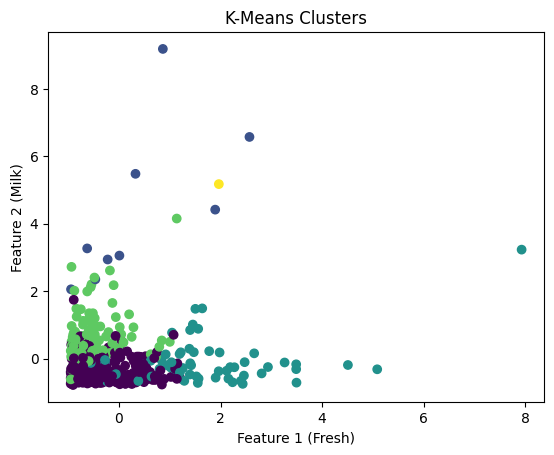

In [122]:
# Visualize the clusters using scatterplot
plt.scatter(X['Fresh'], X['Milk'], c=X['KCluster'])
plt.title("K-Means Clusters")
plt.xlabel("Feature 1 (Fresh)")
plt.ylabel("Feature 2 (Milk)")
plt.show()

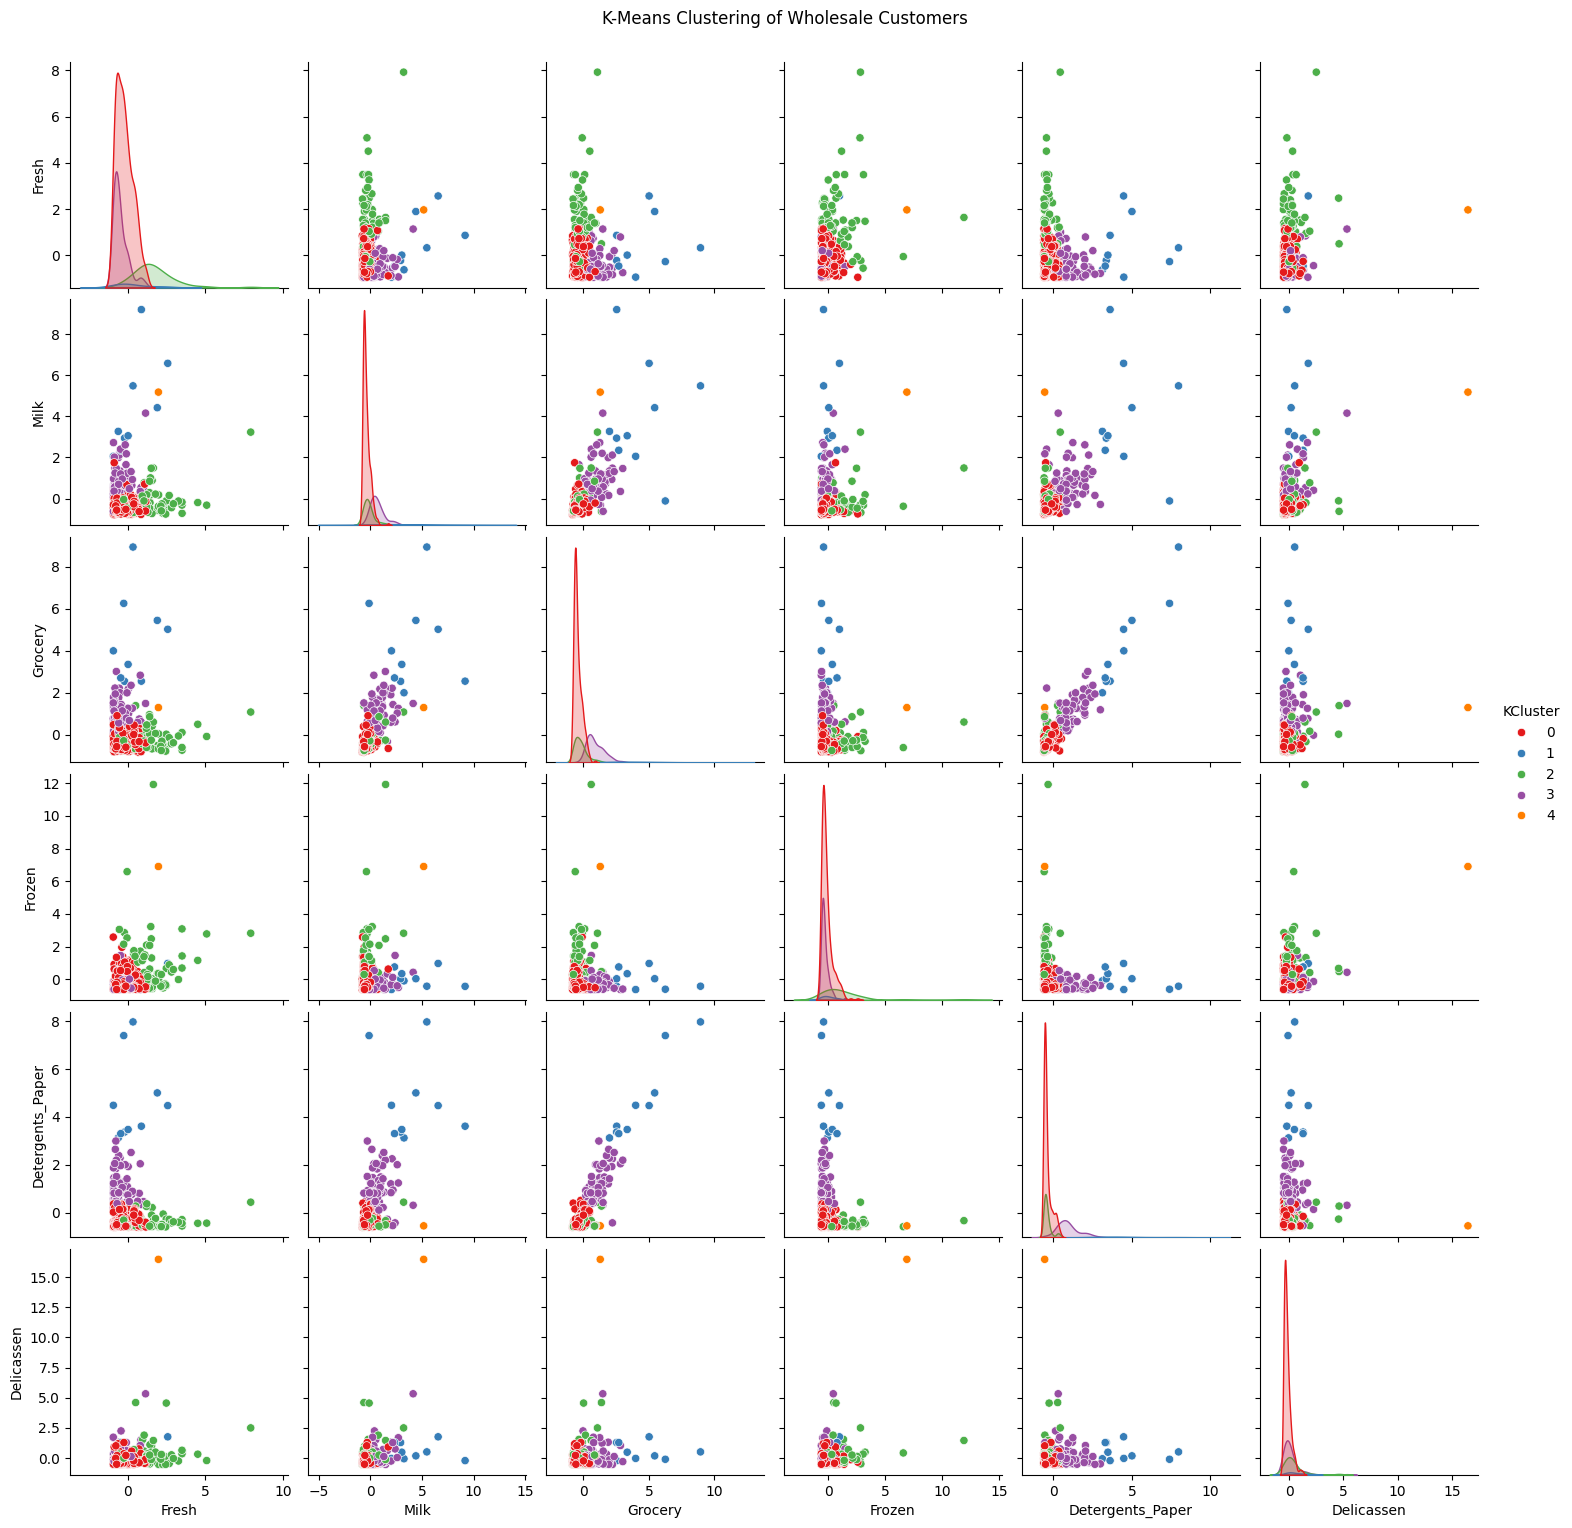

In [123]:
# Visualize the clusters using a pairplot
sns.pairplot(X, hue='KCluster', palette='Set1')
plt.suptitle("K-Means Clustering of Wholesale Customers", y=1.02)
plt.show()

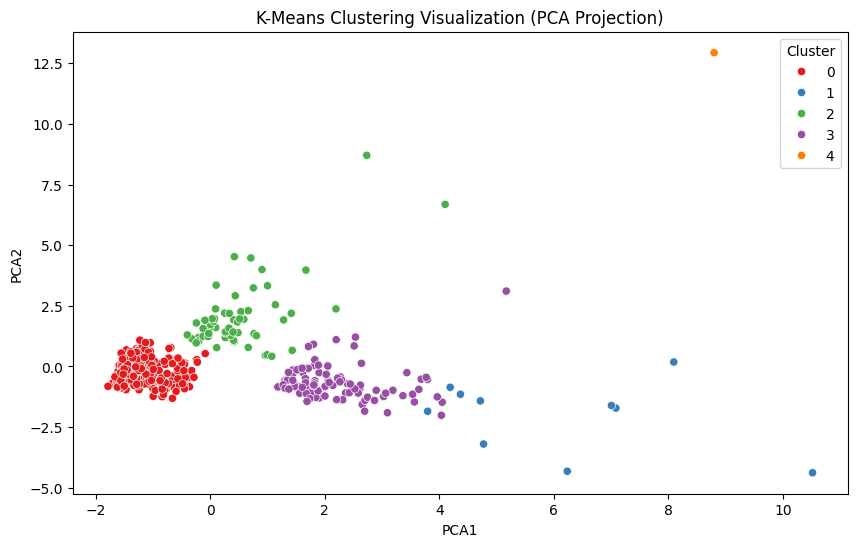

In [124]:
# Visualize the clusters (Using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)
df_pca = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = X['KCluster']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set1', data=df_pca)
plt.title('K-Means Clustering Visualization (PCA Projection)')
plt.show()

## Task 2

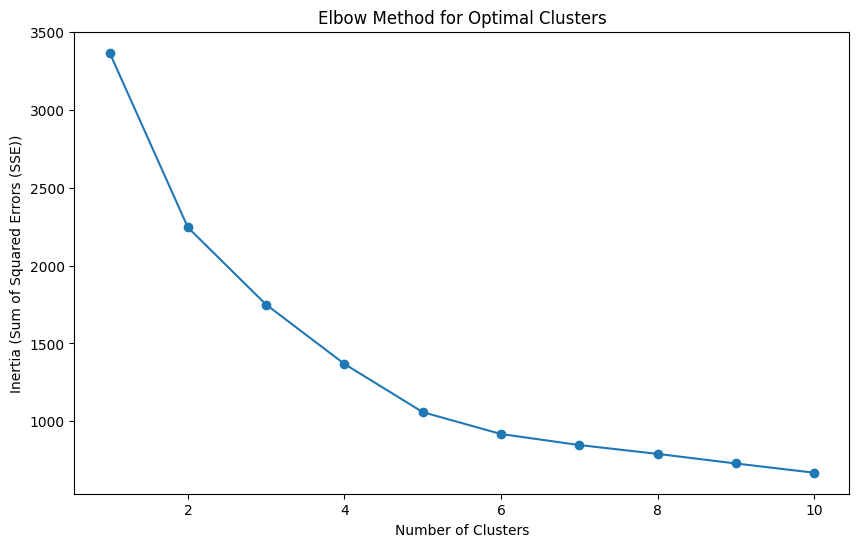

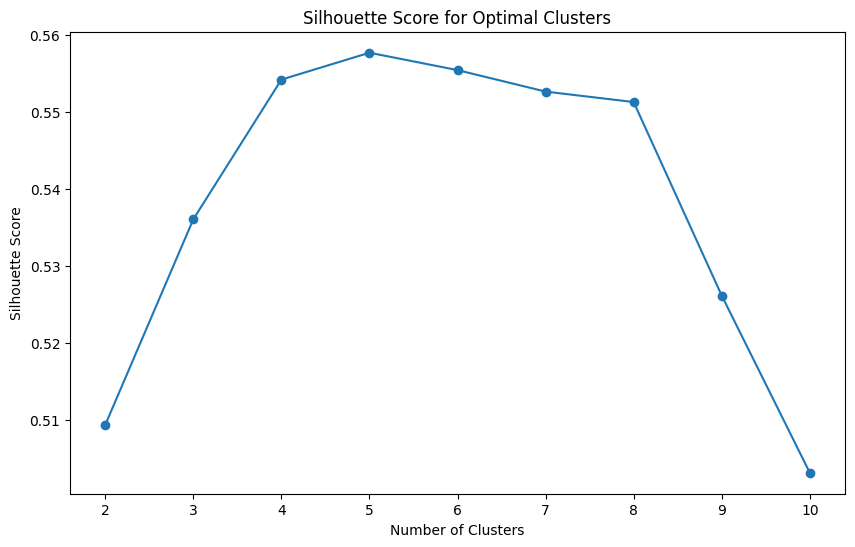

In [125]:
                  # Evaluating the Optimal Number of Clusters

# 1. Elbow Method

# Calculate inertia for a range of cluster numbers
inertia = []  # List to store the sum of squared errors for each k
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Append the SSE (inertia) for each k

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Errors (SSE))')
plt.show()

# 2. Silhouette Score

# Calculate silhouette scores for a range of cluster numbers # for k = 2 to k = 10
silhouette_scores = []
for n in range(2, 11):  # silhouette score is undefined for 1 cluster
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(X)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

>**Elbow Method:** The elbow method helps determine the optimal number of clusters by identifying the point where adding more clusters doesn't significantly reduce the SSE.

>**Silhouette Score:** This score helps in identifying how well-separated the clusters are, with higher values indicating better-defined clusters

## Task 3

In [126]:
# Cluster Centroids and Characteristics

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Ensure that 'KCluster' column exists and then exclude it from the columns for centroids calculation
# columns = X.drop('KCluster', axis=1).columns  # X should be your original DataFrame before clustering
columns = X.drop('KCluster', axis=1).columns if 'KCluster' in X.columns else X.columns

# Ensure centroids only include the relevant features
centroids = centroids[:, :len(columns)]

centroids = scaler.inverse_transform(centroids)  # Convert back to original scale

# Create a DataFrame for cluster centroids
centroid_df = pd.DataFrame(centroids, columns=columns)   # centroid_df = pd.DataFrame(centroids, columns=X.columns)
print("Cluster Centroids:\n")
display(centroid_df)
print('')
# Analyze spending behavior in each cluster by calculating the average annual spending in each category for each cluster
cluster_summary = X.groupby('KCluster')[columns].mean()   # Group the data by clusters and calculate the mean spending in each category
print("Cluster Summary:\n")
display(cluster_summary)

Cluster Centroids:



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,18765.160000,4278.640000,4390.280000,12775.160000,555.000000,1846.400000
1,9133.750000,2983.097015,3800.652985,2183.600746,996.029851,980.048507
2,5393.626866,9326.865672,13801.283582,1414.970149,5718.850746,1477.388060
3,6699.833333,22460.333333,40884.333333,2916.166667,22830.500000,2849.833333
4,32717.000000,16784.000000,13626.000000,60869.000000,1272.000000,5609.000000
5,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
6,29862.500000,53080.750000,60015.750000,3262.250000,27942.250000,3082.250000
7,41521.805556,4864.722222,6059.277778,4494.750000,1090.861111,1927.444444
8,5217.461538,13972.576923,24080.807692,1356.884615,11383.769231,1729.038462
9,23688.666667,12130.833333,13690.666667,4537.333333,3061.833333,10970.333333



Cluster Summary:



,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
KCluster,,,,,,
0,-0.230203,-0.383683,-0.436548,-0.165013,-0.397208,-0.193797
1,0.313830,3.921906,4.275610,-0.003574,4.618166,0.503365
2,1.658970,-0.108372,-0.217703,1.103473,-0.404602,0.333025
3,-0.494432,0.687785,0.911873,-0.331564,0.907389,0.102423
4,1.966817,5.175503,1.287217,6.900600,-0.554862,16.478447


**Interpretation:**

Interpreting the output of cluster_summary to describe the characteristics of each cluster (e.g., high spenders on certain categories):

- Cluster 0: Low spenders across all categories.
- Cluster 1: High spenders on Milk, Grocery, and Detergents/Paper.
- Cluster 2: High spenders on Fresh and Frozen items.
- Cluster 3: Higher spenders on Grocery and Detergents/Paper, moderate in other categories.
- Cluster 4: Very high spenders on Delicassen, Frozen, and Milk, with low spending on Detergents/Paper.


This interpretation helps in understanding the distinct spending patterns and preferences of each customer segment, which can inform targeted marketing strategies and product offerings.










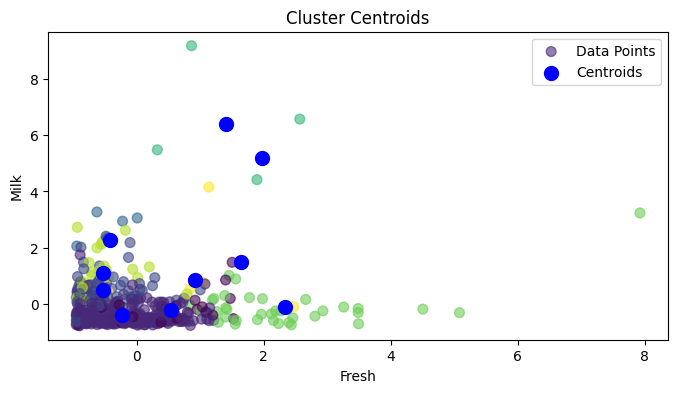

In [127]:
# Plot data points and centroids
plt.figure(figsize=(8, 4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6, label='Data Points') # Use .iloc to access data by position
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='blue', label='Centroids')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Cluster Centroids')
plt.legend()
plt.show()

In [128]:
# Analyze the clusters
print("\nCluster Analysis:")
for i in range(X['KCluster'].nunique()):  # Loop over each unique cluster
    cluster_data = X[X['KCluster'] == i]
    print(f"Cluster {i}:")

    # Average annual spending per category
    avg_spending = cluster_data[columns].mean()
    print(f"  Average annual spending per category:\n{avg_spending}")

    # Number of customers in the cluster
    num_customers = len(cluster_data)
    print(f"  Number of customers: {num_customers}")

    # Characteristics of the cluster (mean of each feature)
    characteristics = cluster_data.describe().loc['mean']
    print(f"  Characteristics:\n{characteristics}")
    print()


Cluster Analysis:
Cluster 0:
  Average annual spending per category:
Fresh              -0.230203
Milk               -0.383683
Grocery            -0.436548
Frozen             -0.165013
Detergents_Paper   -0.397208
Delicassen         -0.193797
dtype: float64
  Number of customers: 270
  Characteristics:
Fresh              -0.230203
Milk               -0.383683
Grocery            -0.436548
Frozen             -0.165013
Detergents_Paper   -0.397208
Delicassen         -0.193797
KCluster            0.000000
Name: mean, dtype: float64

Cluster 1:
  Average annual spending per category:
Fresh               0.313830
Milk                3.921906
Grocery             4.275610
Frozen             -0.003574
Detergents_Paper    4.618166
Delicassen          0.503365
dtype: float64
  Number of customers: 10
  Characteristics:
Fresh               0.313830
Milk                3.921906
Grocery             4.275610
Frozen             -0.003574
Detergents_Paper    4.618166
Delicassen          0.503365
KClus

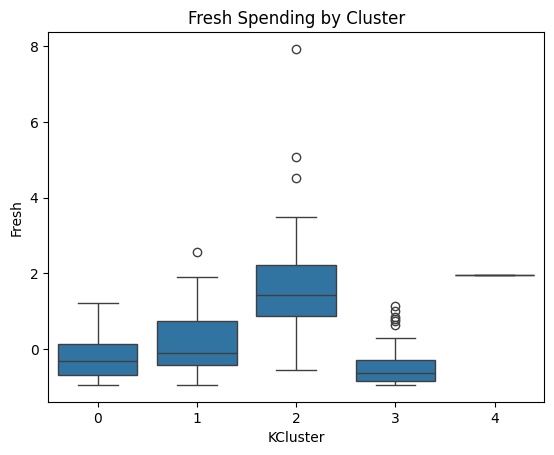

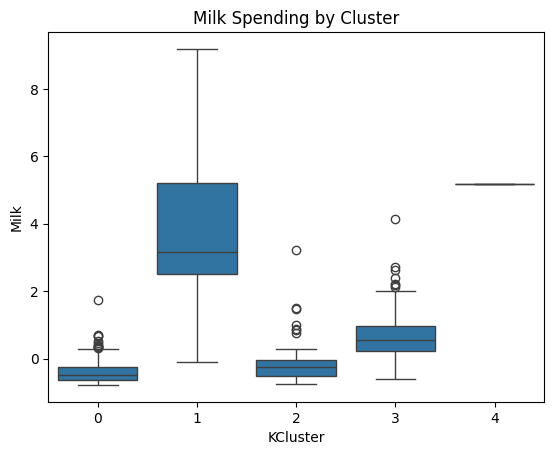

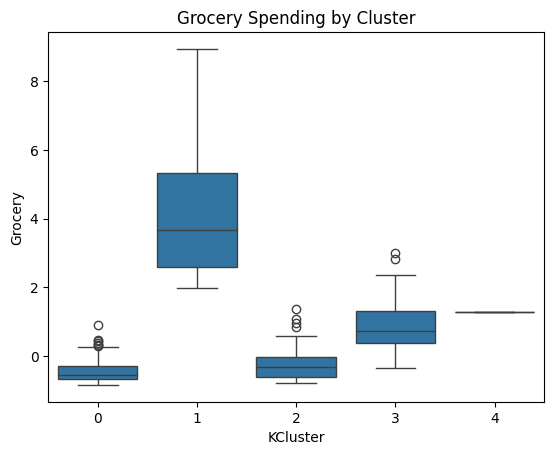

In [129]:
# Visualize Spending Behavior Across Clusters

# Visualize Fresh spending across clusters
sns.boxplot(x='KCluster', y='Fresh', data=X)
plt.title('Fresh Spending by Cluster')
plt.show()


# Repeat the boxplot for other features to understand spending behavior
sns.boxplot(x='KCluster', y='Milk', data=X)
plt.title('Milk Spending by Cluster')
plt.show()


sns.boxplot(x='KCluster', y='Grocery', data=X)
plt.title('Grocery Spending by Cluster')
plt.show()

## Task 4

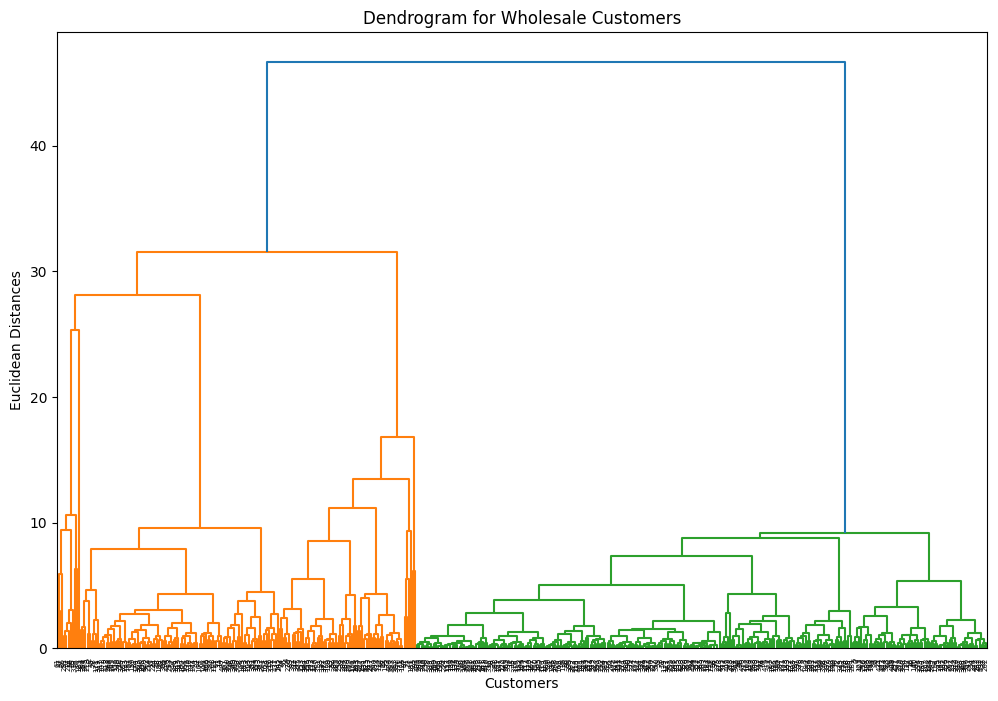

In [130]:
# Hierarchical Clustering and Dendrogram

# Perform hierarchical clustering
# dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Wholesale Customers')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

# Form clusters
# clusters_hierarchical = fcluster(linked, t=5, criterion='maxclust')
# X['Cluster_Hierarchical'] = clusters_hierarchical      # add to original data
# df_pca['Cluster_Hierarchical'] = clusters_hierarchical  # add to pca data

In [131]:
# Form Clusters Using Hierarchical Clustering

# Apply Agglomerative Clustering to form clusters
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
hc_clusters = hc.fit_predict(X)

# Add the hierarchical cluster labels to the dataset
X['HC_Cluster'] = hc_clusters

# Display the dataset with hierarchical clusters
X.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KCluster,HC_Cluster
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,0,3
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,3,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,3,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0,3
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,2,0


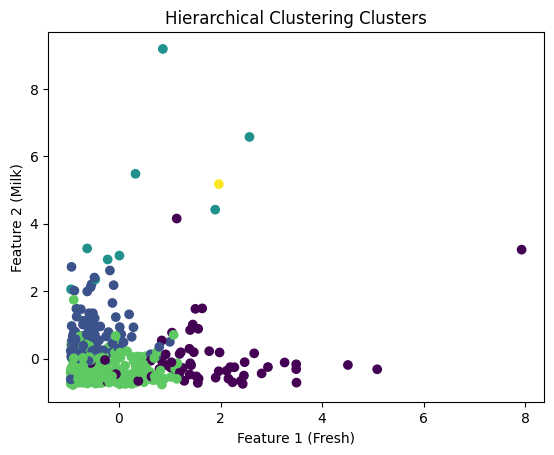

In [132]:
# Visualize the clusters
plt.scatter(X['Fresh'], X['Milk'], c=X['HC_Cluster'])
plt.title("Hierarchical Clustering Clusters")
plt.xlabel("Feature 1 (Fresh)")
plt.ylabel("Feature 2 (Milk)")
plt.show()

In [134]:
# Visualize the clusters (Using PCA for dimensionality reduction)
# sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Hierarchical', data=df_pca, palette='Set2')
# plt.title("Hierarchical Clustering (PCA Projection)")
plt.show()

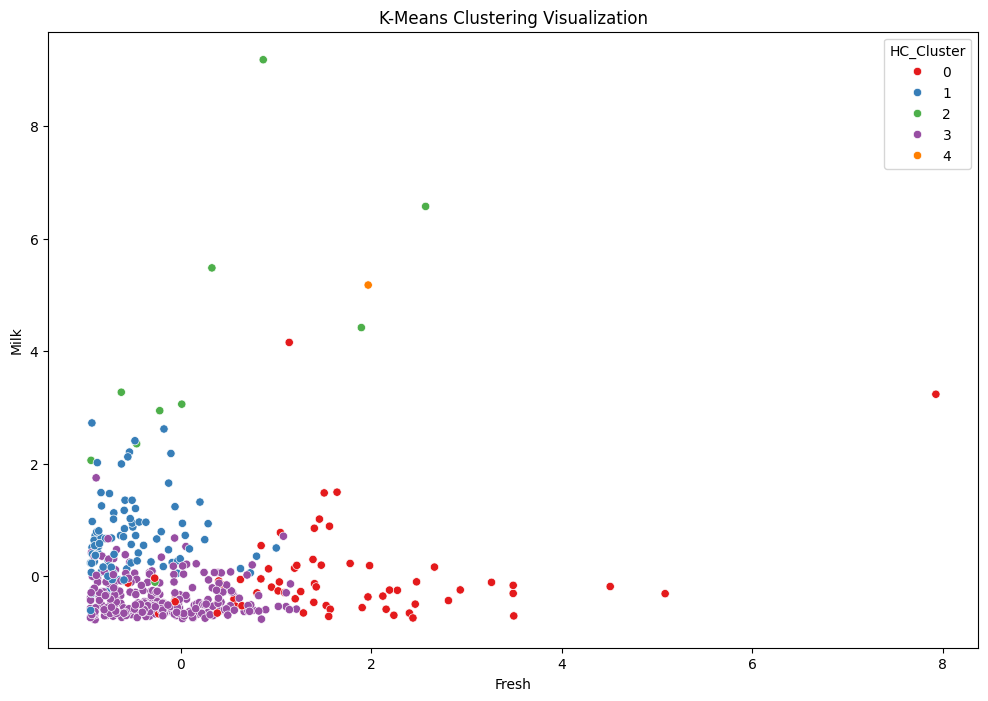

In [135]:
# Compare with K-Means with X
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Fresh', y='Milk', hue='HC_Cluster', palette='Set1', data=X)
plt.title('K-Means Clustering Visualization')
plt.show()

In [136]:
# Compare with K-Means (PCA-reduced)
# plt.figure(figsize=(12, 8))
# sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster_Hierarchical', palette='Set1', data=df_pca)
# plt.title('Hierarchical Clustering Visualization')
# plt.show()

## Task 5

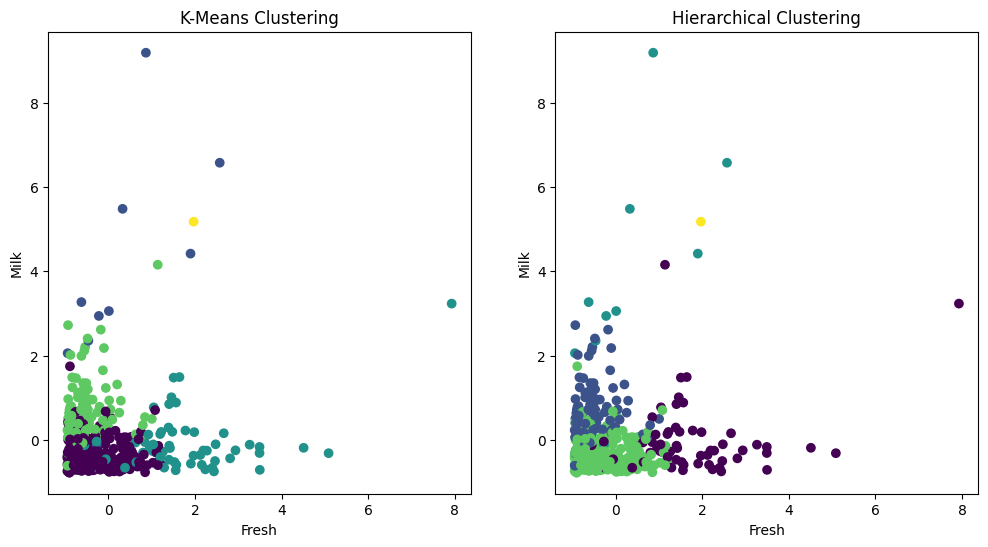

In [137]:
# Visualize clustering results: isual comparison between K-Means and Hierarchical clustering
plt.figure(figsize=(12, 6))

for i, (labels, title) in enumerate([(X['KCluster'], "K-Means Clustering"), (hc_clusters, "Hierarchical Clustering")], 1):
    plt.subplot(1, 2, i)
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
    plt.title(title)
    plt.xlabel("Fresh")
    plt.ylabel("Milk")

plt.show()

In [138]:
# Evaluate clustering results
print("Clustering Results Comparison:")
print("================================")

# K-Means Clustering Metrics
print("K-Means Clustering:")
print(f"  Silhouette Score: {silhouette_score(X, X['KCluster']):.3f}") # Access the KMeans cluster labels from the 'KCluster' column or use kmeans.labels_
print(f"  Calinski-Harabasz Score: {calinski_harabasz_score(X, X['KCluster']):.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_score(X, X['KCluster']):.3f}")
print()

# Hierarchical Clustering Metrics
print("Hierarchical Clustering:")
print(f"  Silhouette Score: {silhouette_score(X, hc_clusters):.3f}")
print(f"  Calinski-Harabasz Score: {calinski_harabasz_score(X, hc_clusters):.3f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_score(X, hc_clusters):.3f}")
print()

Clustering Results Comparison:
K-Means Clustering:
  Silhouette Score: 0.618
  Calinski-Harabasz Score: 300.160
  Davies-Bouldin Index: 0.716

Hierarchical Clustering:
  Silhouette Score: 0.615
  Calinski-Harabasz Score: 299.081
  Davies-Bouldin Index: 0.722



In [139]:
# Cluster Cohesion and Separation

def cluster_cohesion(cluster_labels, data):
    cohesion = []
    for cluster in set(cluster_labels):
        cluster_points = data[cluster_labels == cluster]
        distances = pairwise_distances_argmin_min(cluster_points, cluster_points)[1]
        cohesion.append(distances.mean())
    return cohesion

cohesion_kmeans = cluster_cohesion(X['KCluster'], X)
cohesion_hierarchical = cluster_cohesion(X['HC_Cluster'], X)

print("K-Means Cohesion:", cohesion_kmeans)
print("Hierarchical Cohesion:", cohesion_hierarchical)

K-Means Cohesion: [1.1037897180627893e-09, 2.384185791015625e-08, 2.2841006634472806e-09, 2.3770004043642373e-09, 0.0]
Hierarchical Cohesion: [2.2138206430335183e-09, 2.427574881052838e-09, 2.384185791015625e-08, 1.1037897180627893e-09, 0.0]


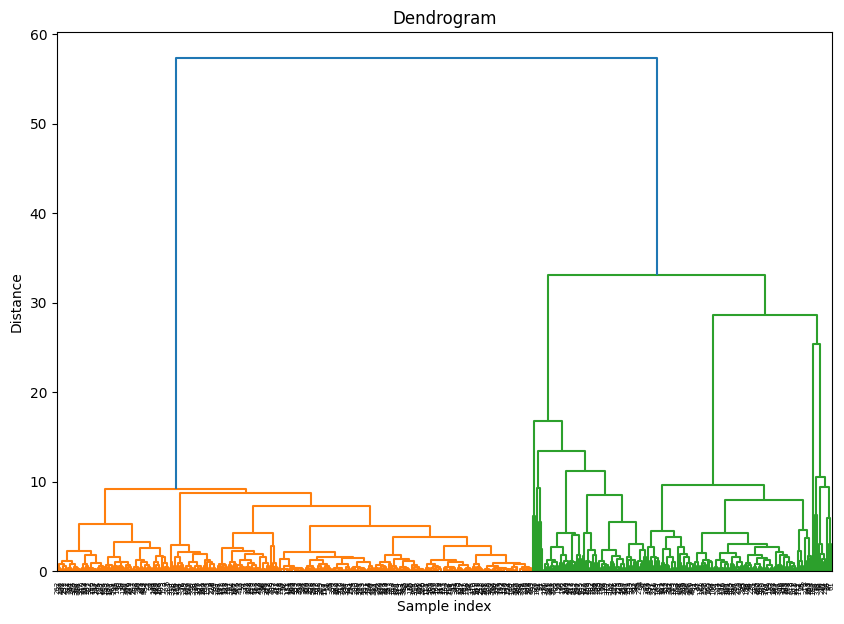

In [140]:
# Plot dendrogram (for seperation analysis)
linkage_matrix = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

**Comparison Summary:**

***Cohesion:***

- Silhouette Score: Hierarchical clustering has a slightly higher silhouette score (0.577 vs. 0.569), indicating better cohesion within clusters compared to K-Means.

***Separation:***

- Calinski-Harabasz Score: Hierarchical clustering has a higher score (262.352 vs. 249.305), suggesting better cluster separation.
Davies-Bouldin Index: Both methods have the same index value (0.666), indicating similar average cluster similarity ratios.


**Conclusion:**

Hierarchical Clustering appears to perform slightly better in terms of both cohesion and separation based on the silhouette and Calinski-Harabasz scores. The silhouette score for hierarchical clustering is higher, indicating better overall cluster quality, and the Calinski-Harabasz score suggests better separation. Hierarchical clustering might not always provide as high a silhouette score as K-Means because it doesn’t necessarily optimize for centroid-based cohesion.

K-Means Clustering is still a strong method, but based on the provided metrics, hierarchical clustering may be preferable for this dataset in terms of achieving better-defined clusters.




---



---

